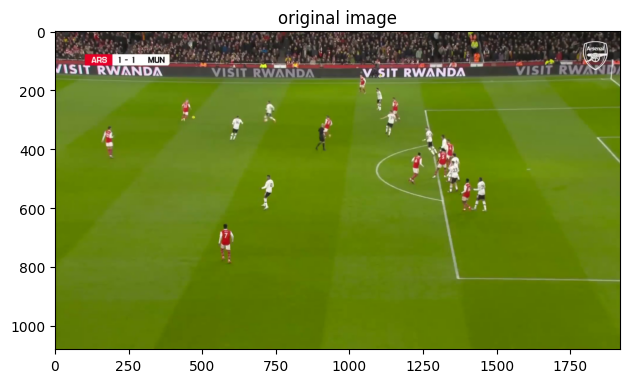

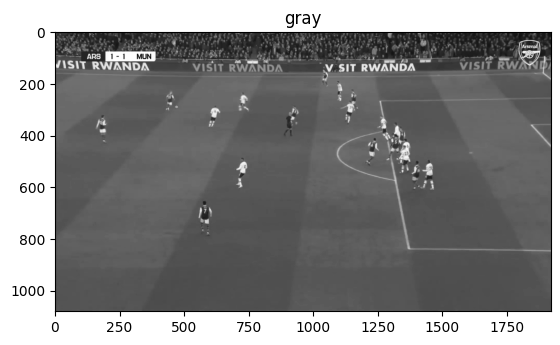

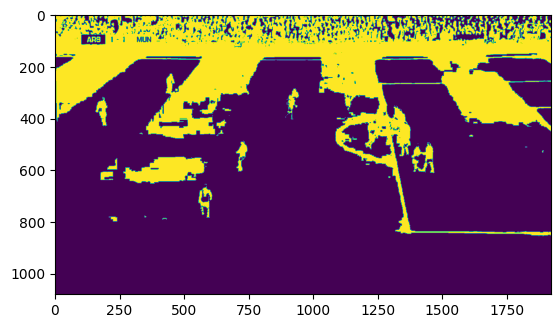

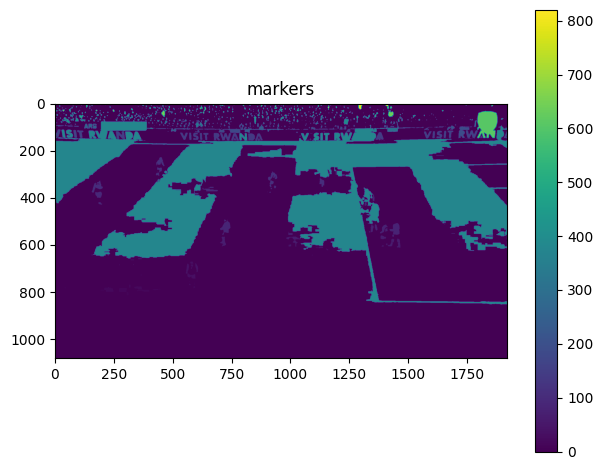

In [28]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
         # Only needed for web grabbing images

# Load some image with circles from web
image = cv2.imread('snap.png')
plt.figure(1), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('original image'), plt.tight_layout(), plt.show()

# Mimic watershed result using findContours and drawContours
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray'), plt.title("gray"), plt.show()
gray = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)[1]
mask = cv2.inRange(image, (36, 25, 25), (255, 255,255))

plt.imshow(mask)
cnts = cv2.findContours(gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
markers = np.zeros_like(gray).astype(np.int32)
for i, cnt in enumerate(cnts):
    markers = cv2.drawContours(markers, [cnt], -1, i+1, cv2.FILLED)
plt.figure(2), plt.imshow(markers), plt.title('markers'), plt.colorbar(), plt.tight_layout()
plt.show()


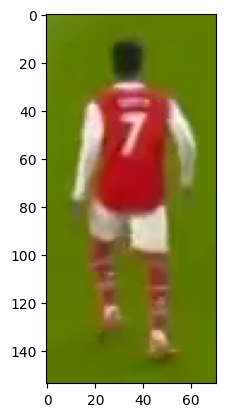

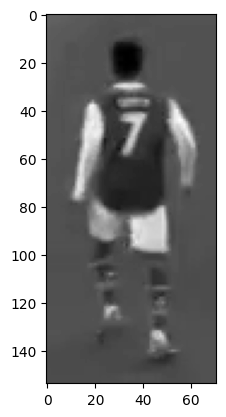

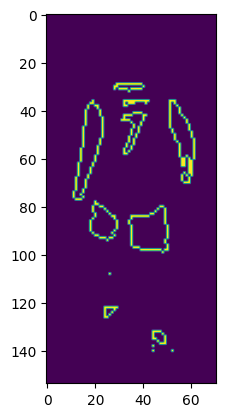

(<matplotlib.image.AxesImage at 0x1f888a72550>, None)

In [88]:
cropped_img = cv2.imread("cropped_image.png")
cropped_img = cropped_img.astype('uint8')
plt.imshow(cropped_img), plt.show()

gray = cv2.cvtColor(cropped_img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray'), plt.show()

thresholdedIm = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
contours, _  = cv2.findContours(thresholdedIm, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# get the white islands (just use the countours, this works fine)
whiteIslands = np.zeros_like(thresholdedIm)
numWhiteIslands = str(len(contours))
cv2.drawContours(whiteIslands, contours, -1, (255,255,0), 0)
plt.imshow(whiteIslands), plt.show()

c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook\__init__.py:743: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.array(x, subok=True, copy=copy)


TypeError: Image data of dtype object cannot be converted to float

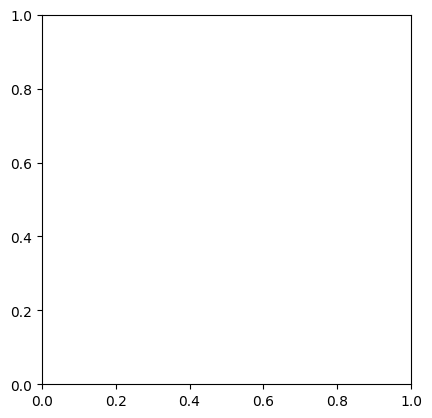

In [54]:
cropped_img = cv2.imread("cropped_image.png")

greenMask = cv2.inRange(cropped_img, (0,100,0),(255,255,255))

greenMask = cv2.threshold(cropped_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(greenMask)

ValueError: operands could not be broadcast together with shapes (154,71,3) (1080,1920,3) (154,71,3) 

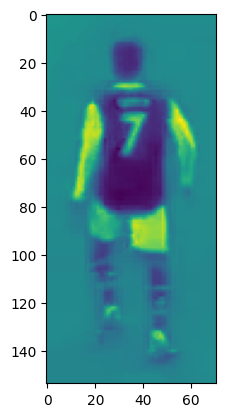

In [60]:
cropped_img.shape

greenImg = cropped_img[:,:,1]
plt.imshow(greenImg)

u_green = np.array([104, 153, 70])
l_green = np.array([30, 30, 0])

mask = cv2.inRange(cropped_img, l_green, u_green)
res = cv2.bitwise_and(cropped_img, cropped_img, mask = mask)

f = cropped_img - res
f = np.where(f == 0, image, f)

cv2.imshow("video", cropped_img)
cv2.imshow("mask", f)

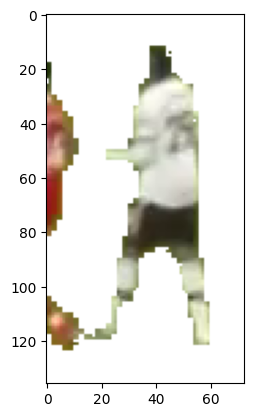

In [144]:
cropped_img2 = cv2.imread("cropped_image2.png")

img = cropped_img2
lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
a_channel = lab[:,:,1]
th = cv2.threshold(a_channel,120,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
masked = cv2.bitwise_and(img, img, mask = th)    # contains dark background
m1 = masked.copy()
m1[th==0]=(255,255,255)  

plt.imshow(m1)

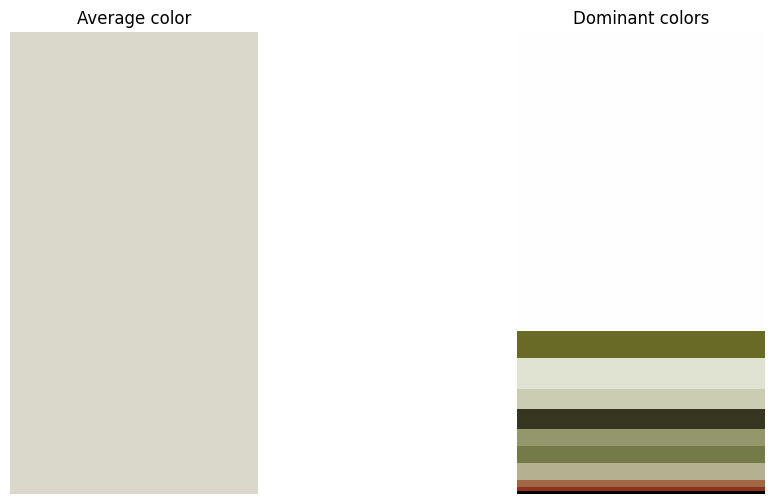

In [141]:
img = m1
average = img.mean(axis=0).mean(axis=0)

pixels = np.float32(img.reshape(-1, 3))

n_colors = 10
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 200, .1)
flags = cv2.KMEANS_RANDOM_CENTERS

_, labels, palette = cv2.kmeans(pixels, n_colors, None, criteria, 10, flags)
_, counts = np.unique(labels, return_counts=True)


dominant = palette[np.argmax(counts)]

import matplotlib.pyplot as plt

avg_patch = np.ones(shape=img.shape, dtype=np.uint8)*np.uint8(average)

indices = np.argsort(counts)[::-1]   
freqs = np.cumsum(np.hstack([[0], counts[indices]/float(counts.sum())]))
rows = np.int_(img.shape[0]*freqs)

dom_patch = np.zeros(shape=img.shape, dtype=np.uint8)
for i in range(len(rows) - 1):
    dom_patch[rows[i]:rows[i + 1], :, :] += np.uint8(palette[indices[i]])
    
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12,6))
ax0.imshow(avg_patch)
ax0.set_title('Average color')
ax0.axis('off')
ax1.imshow(dom_patch)
ax1.set_title('Dominant colors')
ax1.axis('off')
plt.show(fig)

(136, 73, 3)


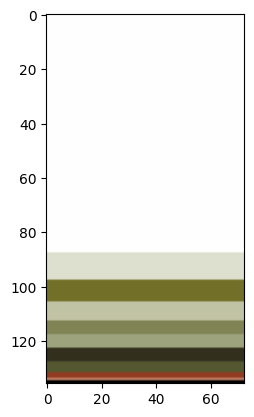

In [140]:
print(dom_patch.shape)
plt.imshow(dom_patch)

In [135]:
print(palette)

[[186.73729  122.26271   97.60169 ]
 [ 83.59124   88.686134  49.021896]
 [254.90321  254.89932  254.76743 ]
 [114.111115 111.89387   40.68491 ]
 [ 50.060173  48.7106    29.90831 ]
 [193.9779   195.0301   165.8032  ]
 [145.4375    59.73125   35.225002]
 [128.       131.71208   83.46272 ]
 [157.71082  163.90811  124.30811 ]
 [221.38083  224.08905  206.16988 ]]


In [136]:
average = palette.mean(axis=0)
print(average)

[153.59102 140.09233 108.69531]


In [132]:
# arsenal
print(palette)
average = palette.mean(axis=0)
print(average)

[[113.5056   103.57986   27.123093]
 [254.98499  254.94037  254.91574 ]
 [ 42.082355  50.22353   16.52353 ]
 [139.2525   110.335     66.7875  ]
 [137.69217   67.37523   42.80328 ]
 [168.78966   24.929134  26.897638]
 [160.5974   146.33441  104.53571 ]
 [195.1573    89.70225   93.58989 ]
 [230.95546  211.73497  191.9421  ]
 [202.35898  168.65527  145.10541 ]]
[164.53764  122.781006  97.022385]


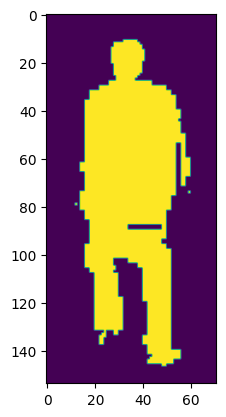

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\core\src\arithm.cpp:230: error: (-215:Assertion failed) (mtype == CV_8U || mtype == CV_8S) && _mask.sameSize(*psrc1) in function 'cv::binary_op'


In [108]:
empty_img = np.zeros_like(img)

RED, GREEN, BLUE = (2, 1, 0)

reds = img[:, :, RED]
greens = img[:, :, GREEN]
blues = img[:, :, BLUE]

mask = (greens < 100) | (reds > greens) | (blues > greens)

result = np.where(mask, 255, 0)

plt.imshow(result), plt.show()

result2 = cv2.bitwise_and(img,img, mask= result)
plt.imshow(result2), plt.show()

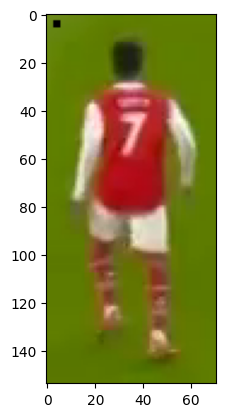

In [105]:
# sample data
img = np.full((10,10,3), 128, np.uint8)
img = cropped_img

# sample mask
mask = np.zeros_like(cropped_img, np.uint8)
mask[3:6, 3:6] = 1

# color to fill
color = np.array([0,0,0], dtype='uint8')


# equal color where mask, else image
# this would paint your object silhouette entirely with `color`
masked_img = np.where(mask[...], color, img)

# use `addWeighted` to blend the two images
# the object will be tinted toward `color`
out = cv2.addWeighted(img, 0, masked_img, 1,0)

plt.imshow(out)